In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
# from imblearn.under_sampling import RandomUnderSampler

In [210]:
df = pd.read_csv("~/workspace/data_science/data/human_stress_detection/SaYoPillow.csv")
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [212]:
y = df.iloc[:, -1]
x = df.iloc[:, :-1]

class_counts = y.value_counts()
print("data class dist: ", class_counts)

data class dist:  sl
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64


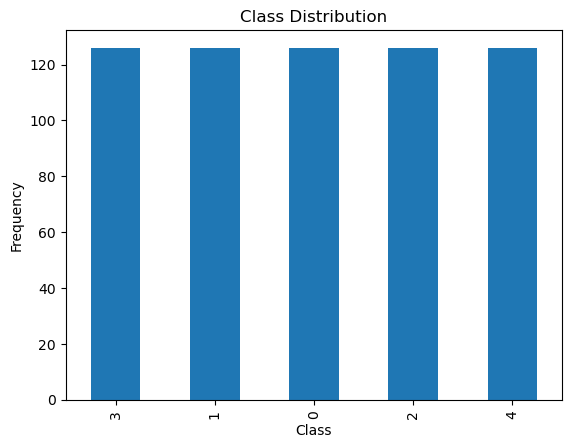

In [213]:
# draw class dist
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [214]:
# if data is inbalance, run undersample
#rus = RandomUnderSampler(random_state=42)
#x_resampled, y_resampled = rus.fit_resample(x, y)

In [215]:
# correlation matrix
corr_matrix = x.corr()
corr_matrix

,sr,rr,t,lm,bo,rem,sr.1,hr
sr,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268
rr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000
t,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237
lm,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738
bo,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210
rem,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572
sr.1,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855
hr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000


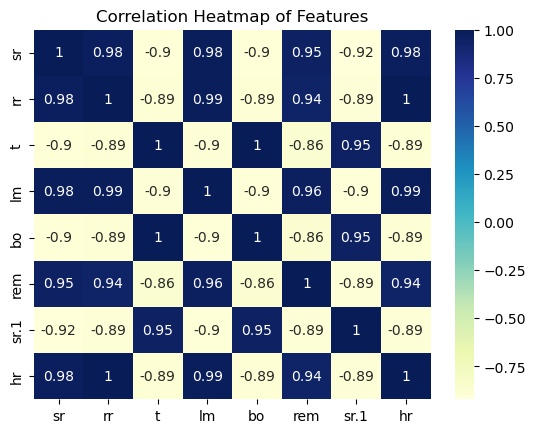

In [216]:
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap of Features')
plt.show()

In [217]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled


array([[ 1.14684518,  0.97906569, -0.2721947 , ...,  0.9340051 ,
        -0.60940713,  0.97906569],
       [ 1.03526024,  0.83371986, -0.35385311, ...,  0.87342099,
        -0.70376694,  0.83371986],
       [-0.59925243, -0.45420573,  0.90731566, ..., -0.29450611,
         1.08120619, -0.45420573],
       ...,
       [ 1.33819268,  1.43932751, -1.67853398, ...,  1.1258548 ,
        -1.21226149,  1.43932751],
       [-0.66950962, -0.52284127,  0.83019383, ..., -0.35172444,
         0.99208859, -0.52284127],
       [ 0.11985049, -0.1029533 ,  0.1678534 , ...,  0.29114033,
         0.12712364, -0.1029533 ]])

In [218]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)
pca.explained_variance_ratio_

array([9.37142350e-01, 4.07433566e-02, 1.22555715e-02, 6.29517809e-03,
       2.94398705e-03, 4.31849841e-04, 1.87706604e-04, 1.19398677e-32])

In [219]:
# 3. select attr
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

In [220]:
# find attrs that can explain 99% of the diff
n_components = next(i for i, cumulative_variance in enumerate(cumulative_explained_variance) if cumulative_variance >= 0.99) + 1
n_components

3

In [221]:
# 4. 生成降维后的数据
x_selected = x_pca[:, :n_components]
x_selected

array([[-2.25004687, -0.878675  , -0.06820802],
       [-2.11175342, -0.59637036, -0.15110276],
       [ 1.84449433, -0.80105686, -0.01623567],
       ...,
       [-4.01006621,  0.33028976,  0.38131037],
       [ 1.86712094, -0.59027065, -0.03364813],
       [ 0.10148743, -0.21958838, -0.28433512]])

In [222]:
# 将降维后的数据转换为 DataFrame
x_selected_df = pd.DataFrame(x_selected, columns=[f'PC{i+1}' for i in range(n_components)])
x_selected_df

,PC1,PC2,PC3
0,-2.250047,-0.878675,-0.068208
1,-2.111753,-0.596370,-0.151103
2,1.844494,-0.801057,-0.016236
3,-1.735288,0.172126,-0.376761
4,3.661345,-0.330122,0.212549
...,...,...,...
625,0.203803,0.160748,-0.285343
626,3.618319,-0.458267,0.165413
627,-4.010066,0.330290,0.381310
628,1.867121,-0.590271,-0.033648


In [223]:
# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x_selected_df, y, test_size=0.2, random_state=42)

# only split scaled data
# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [224]:
# train model
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [225]:
# evaluate model
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("accuracy:", accuracy)
print("report:\n", report)

accuracy: 0.9920634920634921
report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

